In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




In [51]:
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
data = pd.read_csv('ftest.csv')

In [52]:
data.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [53]:
print("dimension of data: {}".format(data.shape))

dimension of data: (14892, 15)


In [54]:
print(data.groupby('class').size())

class
0    8172
1    6720
dtype: int64


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14892 entries, 0 to 14891
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14892 non-null  float64
 1   F7      14892 non-null  float64
 2   F3      14892 non-null  float64
 3   FC5     14892 non-null  float64
 4   T7      14892 non-null  float64
 5   P7      14892 non-null  float64
 6   O1      14892 non-null  float64
 7   O2      14892 non-null  float64
 8   P8      14892 non-null  float64
 9   T8      14892 non-null  float64
 10  FC6     14892 non-null  float64
 11  F4      14892 non-null  float64
 12  F8      14892 non-null  float64
 13  AF4     14892 non-null  float64
 14  class   14892 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [56]:
print("{:7}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}".format("Channel", "min", "mean", "max", "min", "mean", "max"))
x_cols =  ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
for x in x_cols: 
    print("{:6}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}".format(x, data[data['class']==1][x].min(), data[data['class']==1][x].mean(), data[data['class']==1][x].max(), data[data['class']==0][x].min(), data[data['class']==0][x].mean(), data[data['class']==0][x].max()))

Channel	min  	mean 	max  	min  	mean 	max  
AF3   	 4199	 4305	 4441	 4198	 4297	 4501
F7    	 3906	 4005	 4139	 3924	 4012	 4147
F3    	 4212	 4266	 4367	 4197	 4262	 4368
FC5   	 4058	 4121	 4214	 4073	 4122	 4203
T7    	 4310	 4342	 4435	 4305	 4341	 4435
P7    	 4575	 4619	 4709	 4566	 4620	 4728
O1    	 4026	 4074	 4167	 4027	 4071	 4159
O2    	 4568	 4617	 4696	 4567	 4614	 4703
P8    	 4148	 4203	 4288	 4152	 4199	 4295
T8    	 4174	 4233	 4323	 4153	 4229	 4331
FC6   	 4131	 4205	 4312	 4100	 4199	 4314
F4    	 4226	 4282	 4369	 4201	 4276	 4381
F8    	 4510	 4611	 4802	 4443	 4601	 4808
AF4   	 4246	 4367	 4534	 4206	 4355	 4573


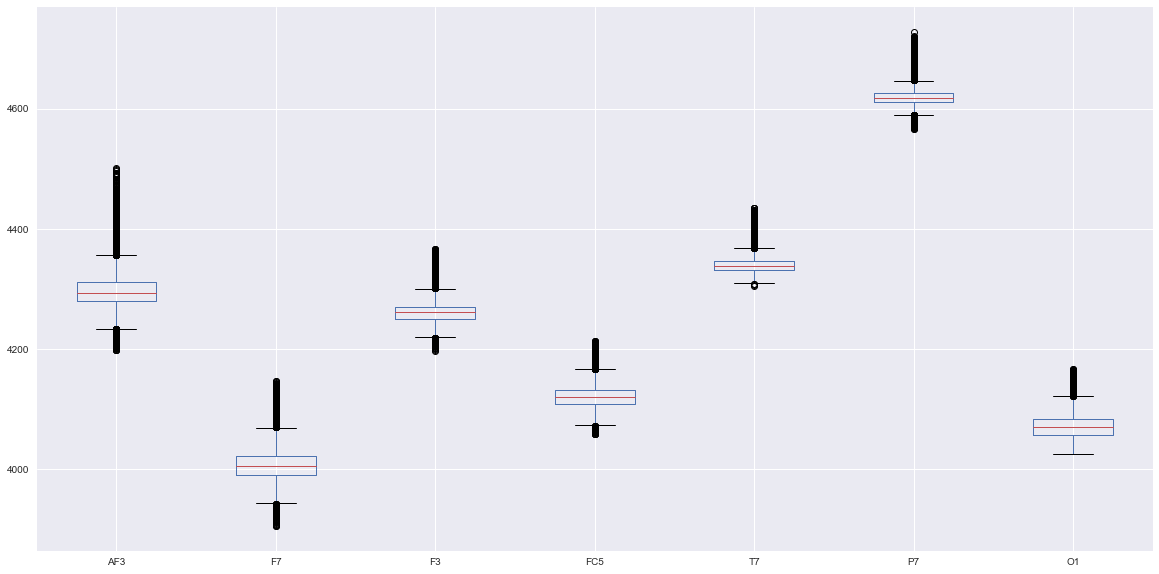

In [57]:
plt.figure(figsize=(20,10))
boxplot = data.boxplot(column=feat_list[0:7])

In [58]:
correlation = data.corr()
eigen_vals, eigen_vecs = np.linalg.eigh(correlation)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.02780056 0.07892328 0.10275234 0.10974194 0.14338083 0.159057
 0.19400724 0.20966709 0.3040204  0.37859797 0.49072352 0.93024309
 1.81470537 2.24421814 7.81216123]


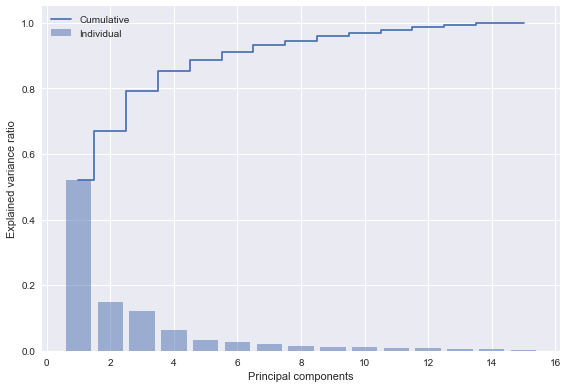

In [59]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pcaz.png')
plt.show()

In [60]:
cum_var_exp

array([0.52081075, 0.67042529, 0.79140565, 0.85342186, 0.88613676,
       0.91137662, 0.93164465, 0.94562245, 0.95855627, 0.96916007,
       0.97871879, 0.98603492, 0.99288508, 0.99814663, 1.        ])

In [61]:
X = data.drop('class', 1)
y = data['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train.shape

(11913, 9)

In [63]:
svc = SVC(kernel='rbf',C=50,gamma='auto',probability=True)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.92


In [64]:
def roc_calc(model,X_test,y_test):
    pred_prob = svc.predict_proba(X_test)
    # auc scores
    auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
    print('accuracy score is: ' + str(auc_score1))
    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='svm')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    
    plt.legend(loc='best')
    plt.show();

accuracy score is: 0.9752398504526065


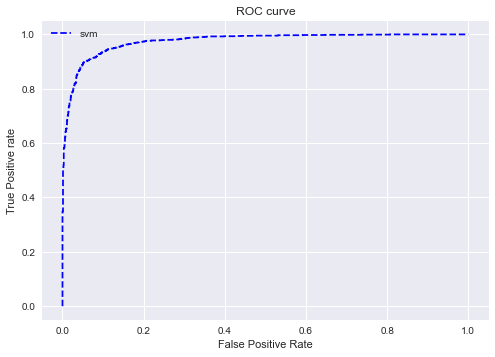

In [65]:
roc_calc(svc,X_test,y_test)

Precision  0.92
Recall 0.91


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x396 with 0 Axes>

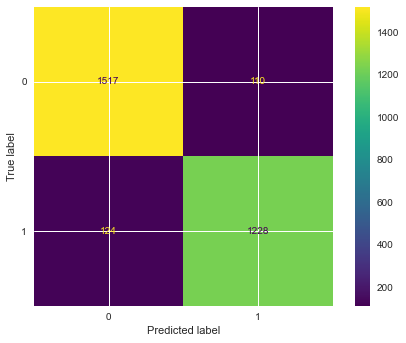

In [66]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

In [67]:
#un-comment below line to see results without PCA
#X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data['class'], stratify=data['class'], random_state=66)

In [68]:
X_train.shape, X_test.shape

((11913, 9), (2979, 9))

In [69]:
ldam=LinearDiscriminantAnalysis()
ldam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(ldam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ldam.score(X_test, y_test)))

Accuracy on training set: 0.63
Accuracy on test set: 0.61


In [70]:
qdam=QuadraticDiscriminantAnalysis()
qdam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(qdam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(qdam.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.73


In [71]:
svc = SVC(kernel='rbf',C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.89
Accuracy on test set: 0.88


Precision  0.89
Recall 0.84


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x396 with 0 Axes>

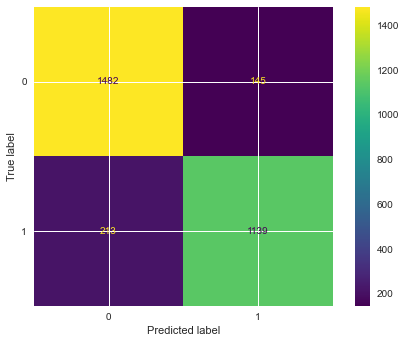

In [72]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

In [73]:
svc = SVC(kernel='poly',degree=3,C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.79
